# Multi linear Regression

Task1:
Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [1]:
import pandas as pd
data = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


There is no null values in the dataset

In [ ]:
data['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [3]:
data = pd.get_dummies(data,columns = ['Fuel_Type'])
data.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,False,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,False,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,False,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,False,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,False,True,False


In [4]:
data.replace({True:1 , False : 0},inplace = True)
data.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0


<Axes: >

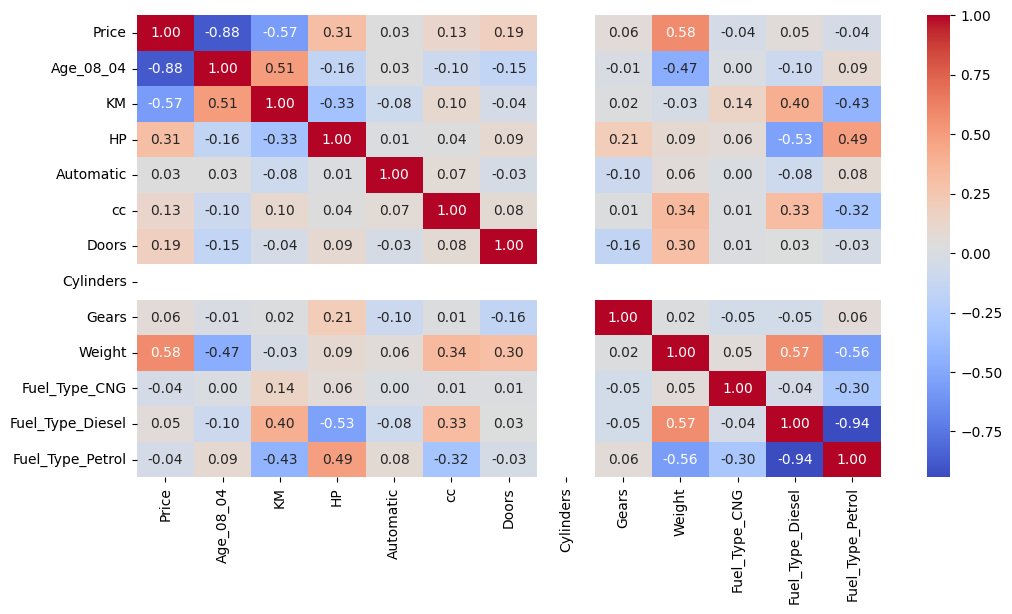

In [5]:
#correlation matrix
corr_matrix = data.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
sns.heatmap(corr_matrix, annot = True , cmap = 'coolwarm' , fmt = '.2f')

<Axes: xlabel='Price', ylabel='Weight'>

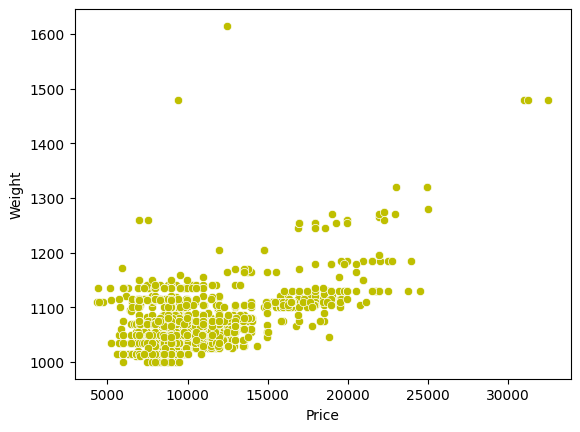

In [6]:
#positive correlation with respect to price and weight
sns.scatterplot(data , x = 'Price' , y = 'Weight' ,c = 'y')

<Axes: xlabel='Price', ylabel='Age_08_04'>

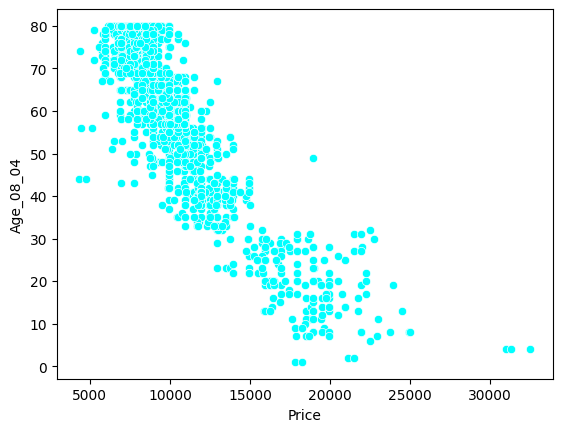

In [7]:
#negative corr with respect to price with age_08_04
sns.scatterplot(data , x = 'Price' , y = 'Age_08_04' , c = 'cyan')

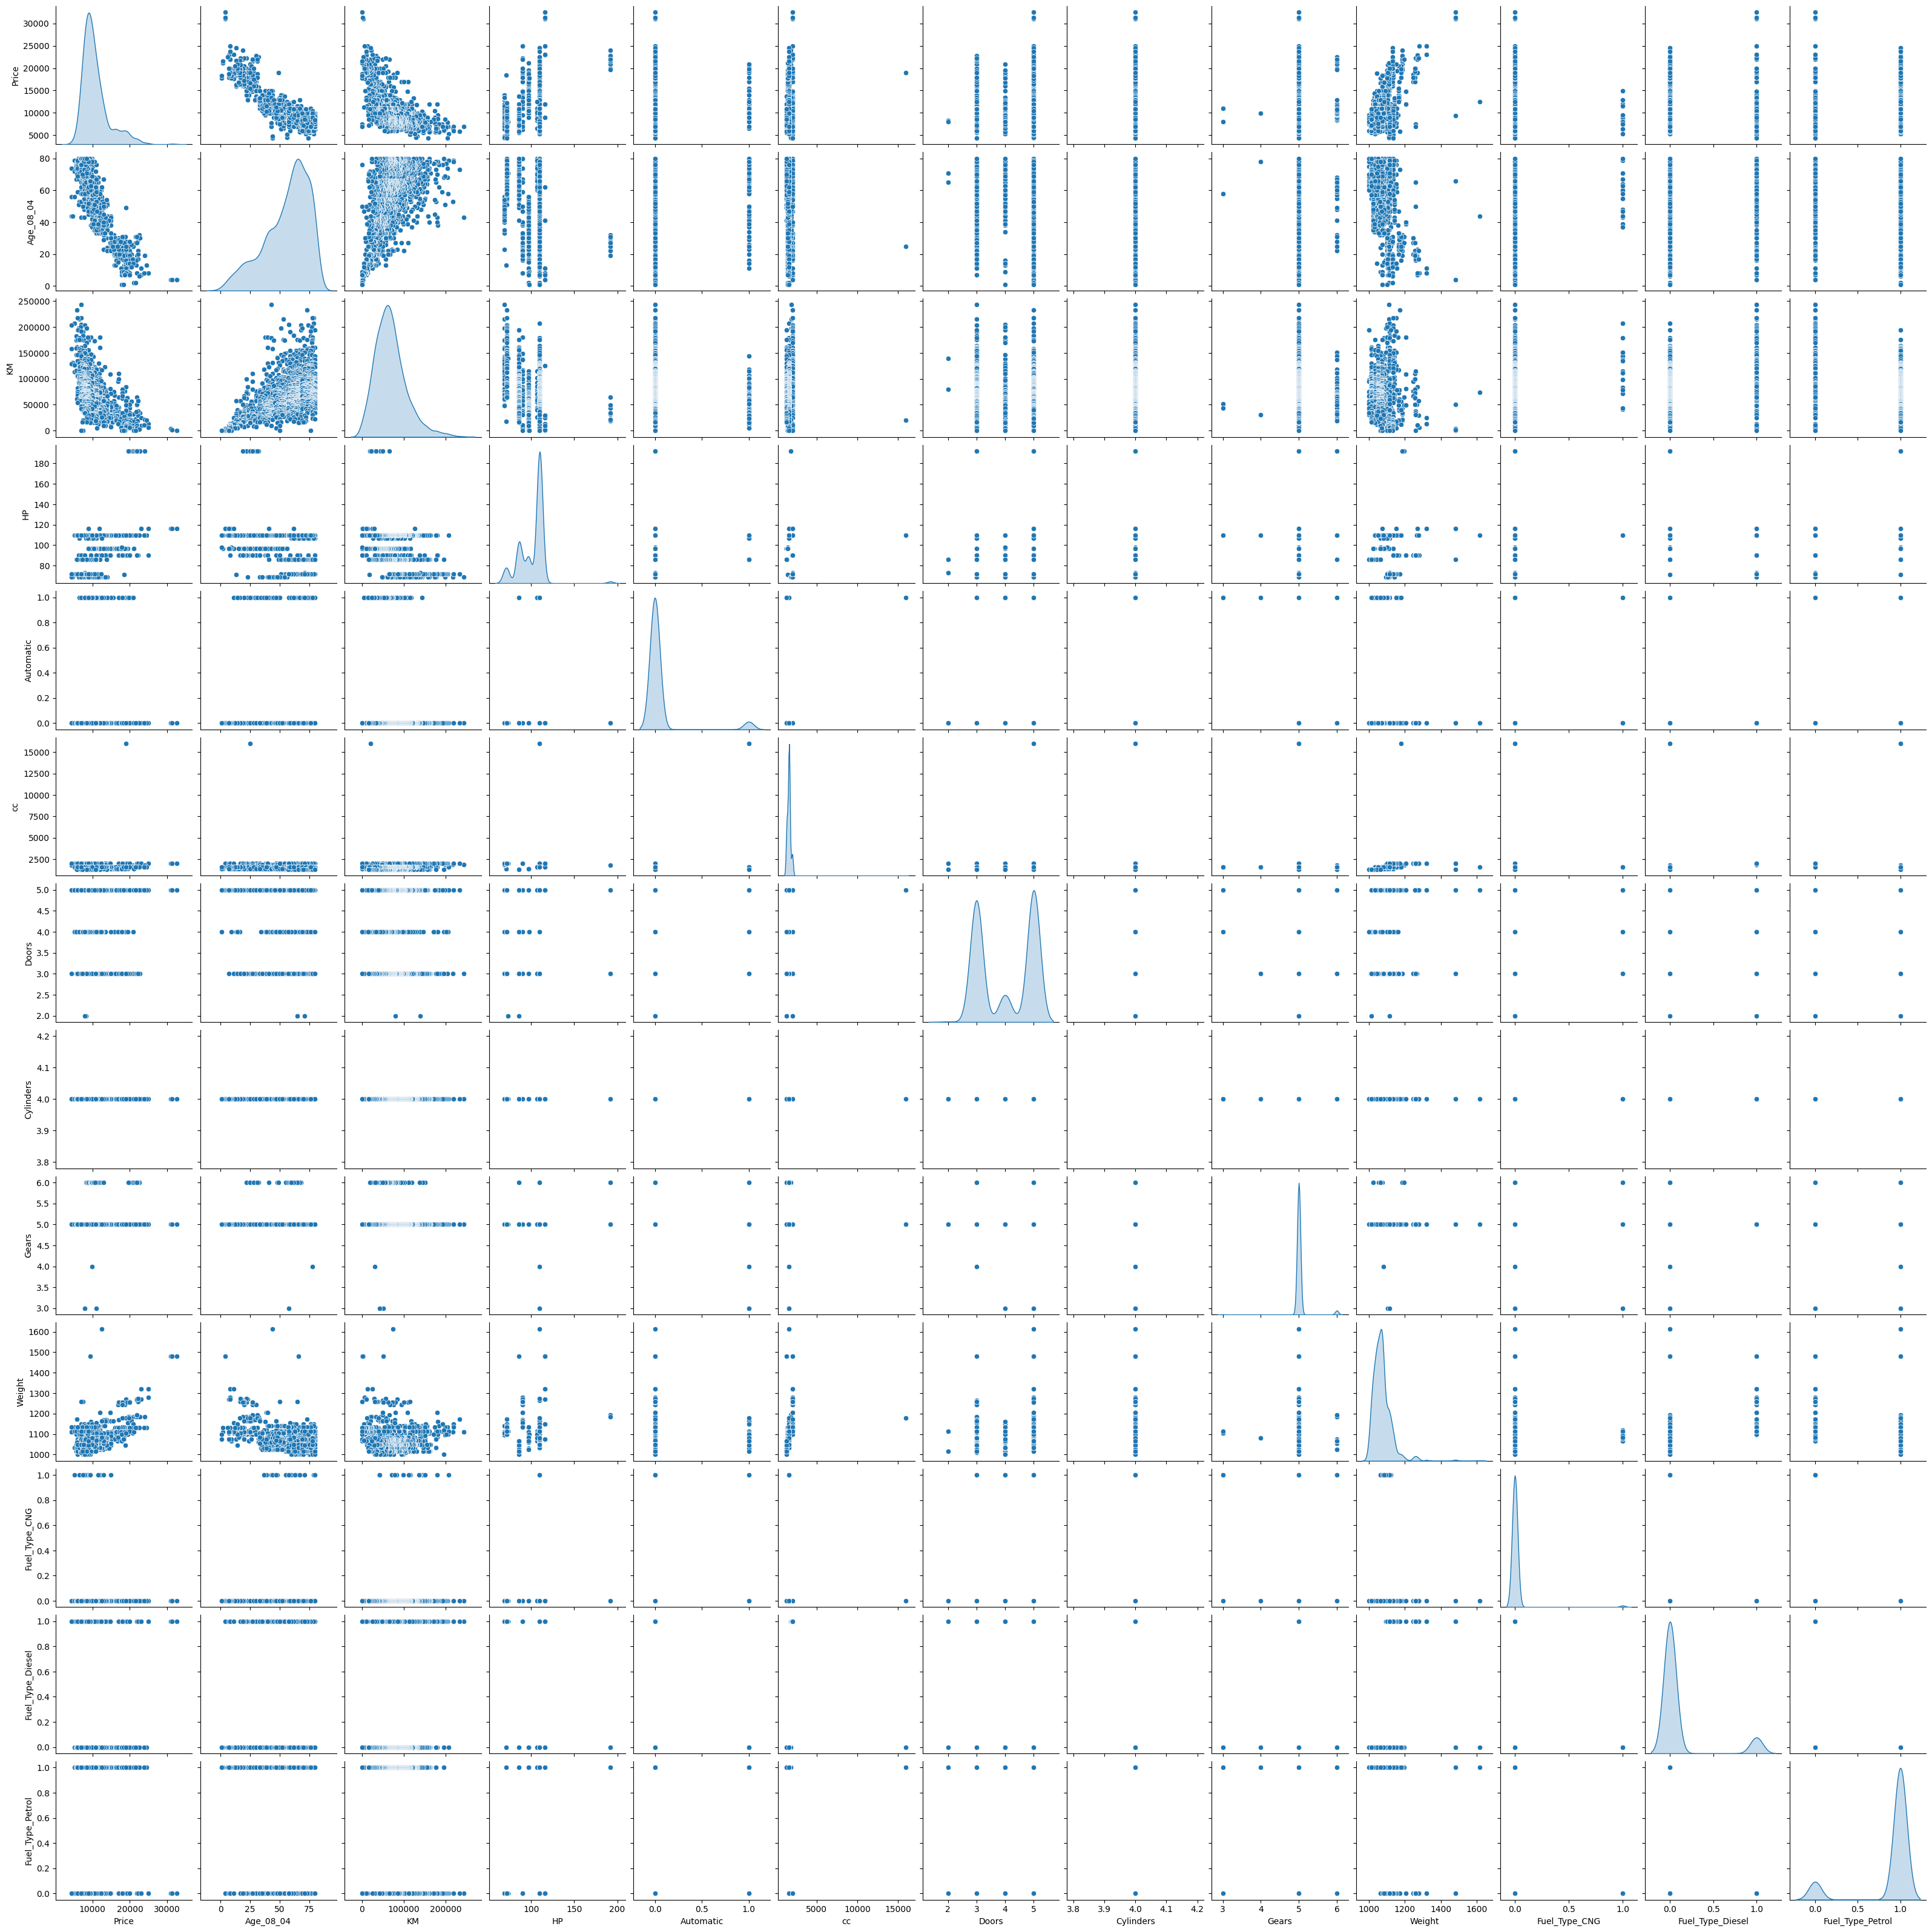

In [9]:
sns.pairplot(data,diag_kind = 'kde')

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a = scaler.fit_transform(data)
a

array([[ 0.76376268, -1.77196633, -0.57469494, ..., -0.10945441,
         2.87480715, -2.71087388],
       [ 0.83271485, -1.77196633,  0.11745379, ..., -0.10945441,
         2.87480715, -2.71087388],
       [ 0.88787659, -1.71818412, -0.71538641, ..., -0.10945441,
         2.87480715, -2.71087388],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -0.10945441,
        -0.34784942,  0.36888474],
       [-0.96004167,  0.75579727, -1.37670303, ..., -0.10945441,
        -0.34784942,  0.36888474],
       [-1.04278428,  1.0784905 , -1.82784925, ..., -0.10945441,
        -0.34784942,  0.36888474]])

In [13]:
df = pd.DataFrame(a,columns =['Price'	,'Age_08_04'	,'KM'	,'HP',	'Automatic',	'cc'	,'Doors',	'Cylinders',	'Gears',	'Weight'	,'Fuel_Type_CNG',	'Fuel_Type_Diesel'	,'Fuel_Type_Petrol'])
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.763763,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,0.832715,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,0.887877,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,1.163685,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,0.832715,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.891089,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
1432,0.031491,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1433,-0.615281,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1434,-0.960042,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885


In [14]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
x

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,-0.109454,2.874807,-2.710874
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,-0.109454,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885


# Task 2.
Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [61]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [62]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 ,random_state = 0)

In [ ]:
x_train

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
609,0.594451,2.835160,-1.969976,-0.242893,0.997419,-0.035099,0.0,-0.140425,0.523355,-0.109454,2.874807,-2.710874
511,-0.266065,-0.403411,0.567440,-0.242893,0.054555,1.014941,0.0,-0.140425,0.143291,-0.109454,-0.347849,0.368885
878,0.217975,-0.174864,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
960,0.540668,-0.472810,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,7.744561,-0.109454,-0.347849,0.368885
303,-0.911451,-0.773717,-0.300623,-0.242893,-0.421592,-1.085139,0.0,-0.140425,-0.901883,-0.109454,-0.347849,0.368885
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.594451,0.299486,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.109454,-0.347849,0.368885
835,0.594451,-0.020571,0.567440,-0.242893,0.054555,-1.085139,0.0,5.166169,-0.141756,-0.109454,-0.347849,0.368885
1216,0.755797,0.462235,-1.969976,-0.242893,0.997419,1.014941,0.0,-0.140425,1.188466,-0.109454,2.874807,-2.710874
559,-0.319847,-0.768863,0.567440,-0.242893,0.054555,1.014941,0.0,-0.140425,0.143291,-0.109454,-0.347849,0.368885


3
.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.


model1 : with using scaled_data (standard scaler)

In [63]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [64]:
y_pred = regression.predict(x_test)
y_pred

array([-6.97838935e-01, -8.32277393e-02,  5.84967937e-01, -8.53910594e-01,
       -7.15686016e-02, -3.44725639e-01, -1.29986473e+00,  1.49217005e+00,
        1.30162842e-01, -5.30145612e-02, -1.06146230e+00,  1.37544126e-01,
        2.74783112e-01, -2.80455185e-01, -8.99339705e-01,  1.46463263e+00,
        1.03543801e-01, -8.66499958e-01,  5.81471883e-01, -5.20577120e-01,
       -1.08449623e+00, -1.25262068e+00,  2.31053338e-01,  3.22411586e-02,
        2.24189771e+00, -8.35225525e-01,  8.82831656e-01, -1.39221828e+00,
       -4.24642911e-01, -7.97633118e-01, -8.97179345e-02, -8.40396466e-01,
        1.49016457e+00, -9.54931160e-01,  8.70797455e-02,  5.92969473e-01,
       -3.32381450e-01,  4.14923443e-01, -2.35531940e-01, -4.75176948e-01,
       -5.03365930e-01, -4.86307484e-02, -2.93266783e-01,  1.75654505e+00,
        9.13394467e-02, -1.00533256e+00, -3.01963473e-01, -8.42067617e-01,
       -6.43023952e-01, -5.63422561e-01,  2.31874919e+00, -6.32944762e-01,
       -9.67999892e-01, -

In [18]:
regression.coef_

array([-6.27362748e-01, -1.77981626e-01,  2.47118427e-01,  2.11072472e-02,
       -4.88771299e-01,  2.36379707e-03,  1.11022302e-16,  2.47356299e-02,
        2.84003556e-01, -7.07974712e-02,  1.27348021e-01, -9.81183831e-02])

In [19]:
regression.intercept_

-0.005669268675294766

In [65]:
from sklearn.metrics import r2_score ,mean_squared_error,adjusted_rand_score
r2_score(y_test,y_pred)

-0.2062554470471305

In [ ]:
import statsmodels.api as sm
import numpy as np
x = np.append(arr = np.ones((1436,1)).astype(int),values = x , axis = 1)
x_opt = x[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
regressor_ols = sm.OLS(endog = y , exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1002.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:51:02   Log-Likelihood:                -607.96
No. Observations:                1436   AIC:                             1236.
Df Residuals:                    1426   BIC:                             1289.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.503e+12   2.43e+12      2.262      0.024     7.3e+11    1.03e+13
x1         -5.503e+12   2.43e+12     -2.262      0.024   -1.03e+13    -7.3e+11
x2            -0.6349      0.014    -46.812      0.000      -0.661      -0.608
x3            -0.1938      0.013    -14.995      0.000      -0.219      -0.168
x4             0.1217      0.011     11.155      0.000       0.100       0.143
x5             0.0240      0.010      2.396      0.017       0.004       0.044
x6            -0.0127      0.011     -1.208      0.227      -0.033       0.008
x7            -0.0030      0.011     -0.281      0.778      -0.024       0.018
x8          1.646e+08   7.28e+07      2.262      0.024    2.18e+07    3.07e+08
x9             0.0320      0.010      3.094      0.002       0.012       0.052
x10            0.2720      0.013     21.523      0.000       0.247       0.297
x11           -0.0304      0.010     -3.029      0.002      -0.050      -0.011
==============================================================================
Omnibus:                      205.735   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1690.679
Skew:                          -0.389   Prob(JB):                         0.00
Kurtosis:                       8.259   Cond. No.                     3.75e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
x_opt = x[:,[2,3,4,9,10,11]]
regressor_ols = sm.OLS(endog = y , exog = x_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                              1509.
Date:                Thu, 04 Jul 2024   Prob (F-statistic):                        0.00
Time:                        18:56:43   Log-Likelihood:                         -607.08
No. Observations:                1436   AIC:                                      1226.
Df Residuals:                    1430   BIC:                                      1258.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6297      0.013    -46.978      0.000      -0.656      -0.603
x2            -0.1996      0.013    -15.730      0.000      -0.225      -0.175
x3             0.1211      0.011     11.212      0.000       0.100       0.142
x4             0.0303      0.010      3.014      0.003       0.011       0.050
x5             0.2694      0.012     23.270      0.000       0.247       0.292
x6            -0.0295      0.010     -2.949      0.003      -0.049      -0.010
==============================================================================
Omnibus:                      201.188   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1606.858
Skew:                          -0.381   Prob(JB):                         0.00
Kurtosis:                       8.126   Cond. No.                         2.50
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# model 2: with taking orginal data

In [22]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [50]:
x1 = data.iloc[:,1:]
y1 = data.iloc[:,0]

In [51]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x1,y1,test_size = 0.2 , random_state = 0)

In [52]:
from sklearn.linear_model import LinearRegression
regression1 = LinearRegression()
regression1.fit(x1,y1)

LinearRegression()

In [53]:
y_pred = regression1.predict(x_test)
y_pred

array([ 8334.0252764 , 10590.41654747, 13049.26880883,  7761.18108583,
       10632.08630799,  9633.05274552,  6052.23242839, 16069.45556278,
       11333.51938079, 10645.30928428,  6864.15548317, 11388.86024811,
       11850.85304733,  9866.42377067,  7588.8252594 , 15967.80244548,
       11224.75697621,  7720.73383962, 13019.83802682,  8985.45740438,
        6512.07723549,  5849.16346773, 11695.45243972, 11138.40703476,
       19127.42751049,  7830.93220597, 14085.34679619,  5657.59740155,
        9289.54308958,  7697.75597839, 10501.58291967,  7361.14639334,
       15690.50327553,  7384.38807987, 10786.87303332, 13058.73370289,
        9615.70809235, 12411.83415672, 10138.60710417,  8754.36613956,
        8595.8155134 , 10661.64238274,  9974.68335974, 17340.82880539,
       10852.20404457,  6806.63440131,  9734.08674434,  7804.12281129,
        8141.75141393,  8772.95360647, 19422.6153426 ,  8507.96166895,
        7287.08561323,  6300.62317105, 11464.88323997, 18283.29665937,
      

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8395910159637042

# model3: removing outliers and train the model

In [47]:
def remove_outliers(aa):
  for i in aa:
    q1 = aa[i].quantile(0.25)
    q3 = aa[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + (1.5 * iqr)
    ll = q1 - (1.5 * iqr)
    aa = aa[(aa[i]>= ll) & (aa[i] <= ul)]
  return aa

re_out_data = remove_outliers(data)
re_out_data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
18,16750,24,25563,110,0,1600,3,4,5,1065,0,0,1
19,16950,30,64359,110,0,1600,3,4,5,1105,0,0,1
20,15950,30,67660,110,0,1600,3,4,5,1105,0,0,1
22,15950,28,56349,110,0,1600,3,4,5,1120,0,0,1
23,16950,28,32220,110,0,1600,3,4,5,1120,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [43]:
re_out_data.shape

(1325, 13)

<Axes: >

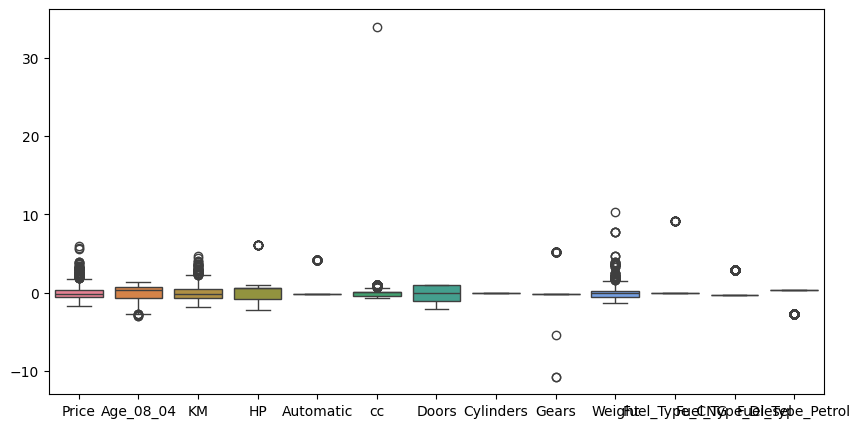

In [35]:
plt.figure(figsize = (10,5))
sns.boxplot(df)

In [49]:
x2= re_out_data.iloc[:,1:]
y2 = re_out_data.iloc[:,0]


In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x2,y2, test_size = 0.2 , random_state = 0)

In [56]:
from sklearn.linear_model import LinearRegression
regression2 = LinearRegression()
regression2.fit(x2,y2)

LinearRegression()

In [58]:
y_pred2 = regression2.predict(x_test)
y_pred2

array([ 7496.22079228, 10102.91562672,  7776.04343103,  8076.98690289,
        9108.09643898, 15198.14284902, 15595.66167073,  8358.06412   ,
       10427.69649336,  9437.74250679, 11530.45411898,  8630.46659403,
       12587.10544897,  7860.75689551, 12786.37579388,  7475.03437768,
        7973.11095445, 10414.17516241,  9307.05079466,  8128.63228878,
        7651.51256172,  8417.65818167,  7128.66122699,  9943.47335785,
       10736.45887564,  7956.05635519, 10689.27094246, 10975.62226171,
        7982.3449191 ,  7590.61296847, 10415.27959046,  8640.06267706,
       10403.30986224,  7213.83391961, 14421.56749989, 12967.6864378 ,
        7863.45598364,  8683.21111449,  8128.1986432 ,  8390.13614729,
       10497.61994375, 10147.08922195, 10844.63344871,  8249.59267924,
        8309.7877736 ,  9295.85853145, 14975.68468816, 14888.38911387,
        9260.67184018,  8080.86459237,  7874.6840312 ,  9663.06608125,
        9056.78679246, 10484.06663468, 12869.317114  ,  9093.97112153,
      

In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.8209743189903695

# model 4 : using normalization ,minmax scaled data

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range = (-1,1))
MMS_data = scaling.fit_transform(data)

In [93]:
MMS_DF = pd.DataFrame(MMS_data,columns = ['Price'	,'Age_08_04'	,'KM',	'HP',	'Automatic',	'cc',	'Doors',	'Cylinders',	'Gears',	'Weight',	'Fuel_Type_CNG',	'Fuel_Type_Diesel',	'Fuel_Type_Petrol'])

In [94]:
x3= MMS_DF.iloc[:,1:]
y3 = MMS_DF.iloc[:,0]

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x3,y3, test_size = 0.2 , random_state = 0)

In [96]:
from sklearn.linear_model import LinearRegression
regression3 = LinearRegression()
regression3.fit(x3,y3)

LinearRegression()

In [97]:
y_pred3 = regression3.predict(x_test)
#y_pred3

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred3)

0.8395910159637064

# model 5 : Apply Lasso and Ridge methods on the model.

In [100]:
data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,0,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,0,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,0,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,0,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,0,1


In [102]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [115]:
x1 = data.iloc[:,1:]
y1 = data.iloc[:,0]

In [116]:
x_train , x_test , y_train , y_test = train_test_split(x1 ,y1 , test_size = 0.2 , random_state = 0)

In [117]:
lasso = Lasso(alpha = 0.1)
lasso.fit(x1,y1)

Lasso(alpha=0.1)

In [119]:
y_pred = lasso.predict(x_test)
y_pred

array([ 8333.83881969, 10590.20389752, 13049.53288469,  7761.45828408,
       10632.21856768,  9633.53064821,  6052.10300328, 16069.36239384,
       11333.61053084, 10645.43296856,  6863.63935661, 11388.91176526,
       11851.07617549,  9866.67165198,  7588.61369522, 15967.66147525,
       11224.76808843,  7721.07441704, 13019.97697064,  8985.76668692,
        6511.86020354,  5848.79292846, 11695.68489146, 11147.10441482,
       19127.49390645,  7831.31015627, 14085.73729099,  5657.40351481,
        9289.47406273,  7697.88270389, 10501.98285073,  7361.52590676,
       15690.92943022,  7384.14833361, 10786.93186032, 13058.95265862,
        9616.1136109 , 12411.83754459, 10136.47386623,  8754.59194914,
        8596.01992519, 10661.71401121,  9972.05058576, 17338.47622079,
       10852.29481534,  6806.7597387 ,  9734.46145917,  7804.3522501 ,
        8142.30071888,  8773.15638404, 19420.46960822,  8507.75358086,
        7287.32893674,  6300.49611533, 11465.29352503, 18283.30587342,
      

In [120]:
r2_score(y_test,y_pred)

0.8396049288030399

# Ridge regression

In [122]:
from sklearn.linear_model import Ridge


In [123]:
x_train , x_test , y_train , y_test = train_test_split(x1 ,y1 , test_size = 0.2 , random_state = 0)

In [127]:
ridge = Ridge(alpha = 0.1)
ridge.fit(x1,y1)

Ridge(alpha=0.1)

In [128]:
y_pred = ridge.predict(x_test)
y_pred

array([ 8333.99599695, 10590.38677865, 13049.41136779,  7761.31043871,
       10632.17685397,  9633.25779081,  6052.22702077, 16069.44348454,
       11333.49741918, 10645.36152075,  6863.92838612, 11388.9303301 ,
       11850.88465703,  9866.55099801,  7588.78675138, 15967.77363196,
       11224.71154199,  7720.88256471, 13019.94414254,  8985.60233046,
        6512.00160579,  5848.9339138 , 11695.4844967 , 11141.80366018,
       19127.40907075,  7831.0962897 , 14085.44405436,  5657.53303349,
        9289.46081355,  7697.80391212, 10501.77531901,  7361.18343981,
       15690.739708  ,  7384.33916271, 10786.8506907 , 13058.81032259,
        9615.89691818, 12411.88945469, 10138.14441468,  8754.45043215,
        8595.8564648 , 10661.6176969 ,  9973.54374191, 17340.20632077,
       10852.26769182,  6806.67700781,  9734.22144131,  7804.2359861 ,
        8141.94407959,  8772.96669772, 19422.06496406,  8507.83536028,
        7287.16617161,  6300.57968881, 11464.973112  , 18283.2554874 ,
      

In [129]:
r2_score(y_pred,y_test)

0.8154386093103283

# conclusion


1. there is no strong correlation between the features.
   the highest correlation is o.56

2. Model 1:trained by using standard scaler data
   the performance is too bad , the r2_score is -0.2062554470471305

3. Model 2: trained by using orginal data
  the r2_score value is 0.8395910159637042 , the performance is good

4. Model 3 :trained with removing outliers
  the r2_score is  0.8209743189903695 , the performance is good

5. Model 4: trained with normalization ,minmaxscaler
   the r2_score is 0.8395910159637064 , the performance is good

6. lasso method:
   the r2_score is 0.8396049288030399, the performance is good

7. ridge method:
   the r2_score is 0.8154386093193283 , the performance is good


# Interview questions

# 1 . What is Normalization & Standardization and how is it helpful?

Normalization and Standardization are techniques used in data preprocessing, particularly in machine learning, to scale and adjust data values to make models perform better or more consistently.

1. Normalization:
Normalization is the process of scaling data to a fixed range, usually between 0 and 1 or -1 and 1. The most common method is called Min-Max Scaling.

2. Standardization:
Standardization, also known as Z-score normalization, transforms data to have a mean of 0 and a standard deviation of 1.

It is helpful in improving model convergence , preventing feature dominance and reducing variance in results.

# 2.What techniques can be used to address multicollinearity in multiple linear regression?

The techniques that can be used to address multicollinearity in multiple linear regression are:
1.Principal Component Analysis (PCA) 
2.Ridge Regression 
3.Lasso Regression 
4.Elastic Net 
5.Partial Least Squares (PLS) Regression